# Sesión 1 – Introducción al Análisis Predictivo
### Exploración inicial de datos con Python

En esta primera sesión trabajaremos con un conjunto de datos sintéticos para:
- Explorar tipos de variables (numéricas y categóricas).
- Visualizar distribuciones simples.
- Comprender cómo el análisis descriptivo prepara el camino para la predicción.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Paso 2: Cargar el conjunto de datos

In [3]:

df = pd.read_csv("/workspaces/proyecto1/datos/Accidentes_Viales_final.csv", encoding='ISO-8859-1')
df.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE


### Paso 3: Revisar estructura del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      512 non-null    int64 
 1   Fecha_Ocurrencia        512 non-null    object
 2   Codigo_Accidente        512 non-null    object
 3   Direccion               512 non-null    object
 4   Barrio                  512 non-null    object
 5   Vehiculos_Involucrados  512 non-null    int64 
 6   Heridos                 512 non-null    int64 
 7   Accidente _con          512 non-null    object
 8   Heridos _SI/NO          512 non-null    int64 
 9   Muertes                 512 non-null    object
 10  Clase_Accidente         512 non-null    object
dtypes: int64(4), object(7)
memory usage: 44.1+ KB


### Paso 4: Descripción estadística general

In [5]:
df.describe(include='all')

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente
count,512.000000,512,512,512,512,512.000000,512.000000,512,512.000000,512,512
unique,NaN,412,509,503,51,NaN,NaN,3,NaN,5,4
top,NaN,12/14/2024 0:00,A001371905,CALLE 13 CARRERA 16 CENTRO,No registra,NaN,NaN,HERIDOS,NaN,NO APLICA,CHOQUE
freq,NaN,3,2,2,201,NaN,NaN,412,NaN,453,450
mean,256.500000,NaN,NaN,NaN,NaN,1.865234,1.298828,NaN,0.804688,NaN,NaN
std,147.945936,NaN,NaN,NaN,NaN,0.471707,0.914419,NaN,0.396829,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN
25%,128.750000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN
50%,256.500000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,1.000000,NaN,NaN
75%,384.250000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,NaN,NaN


## Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1:CANTIDAD DE ACCIDENTES POR MES 

In [6]:
#1.GRAFICA 
# Asegurarse de que la columna de fechas esté en formato datetime
df['Fecha_Ocurrencia'] = pd.to_datetime(df['Fecha_Ocurrencia'], errors='coerce')


*Interpretación: Este gráfico nos muestra cuántos casos hay por categoría de género en la base.*

In [7]:
# Crear una columna para el mes y año
df['Mes_Año'] = df['Fecha_Ocurrencia'].dt.to_period('M')

In [8]:
# Contar accidentes por mes
accidentes_por_mes = df['Mes_Año'].value_counts().sort_index()

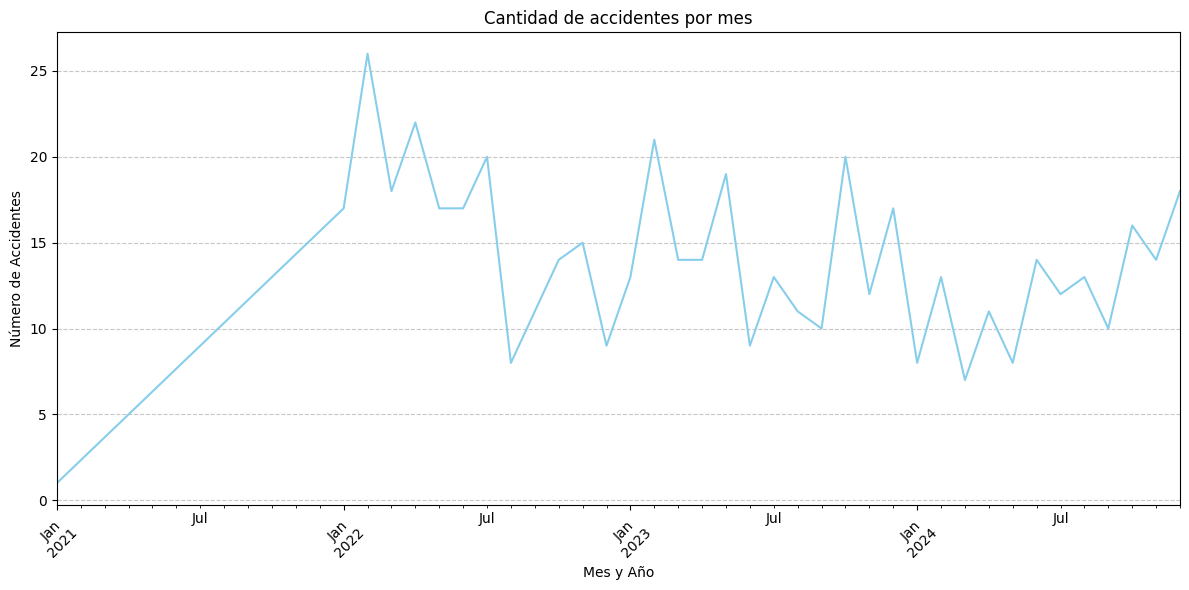

In [9]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
accidentes_por_mes.plot(kind='line', color='skyblue')
plt.title('Cantidad de accidentes por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
#2. GRAFICA
# Contar la frecuencia de cada clase de accidente
clases_accidente = df['Clase_Accidente'].value_counts()

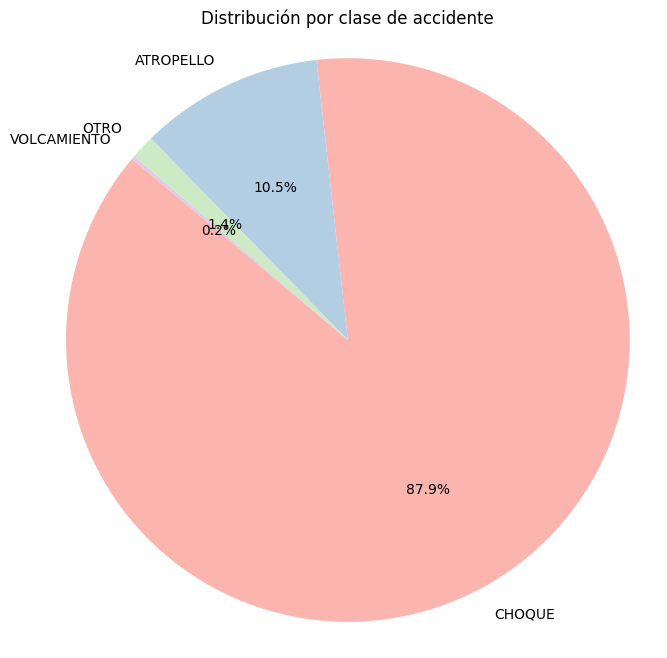

In [11]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clases_accidente,
        labels=clases_accidente.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Distribución por clase de accidente')
plt.axis('equal')  # Para que el gráfico sea circular
plt.show()

In [12]:
# Contar la cantidad de accidentes por barrio
accidentes_por_barrio = df['Barrio'].value_counts().head(10)  # Muestra solo los 10 barrios con más accidentes

/tmp/ipykernel_925/1388281603.py:9: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


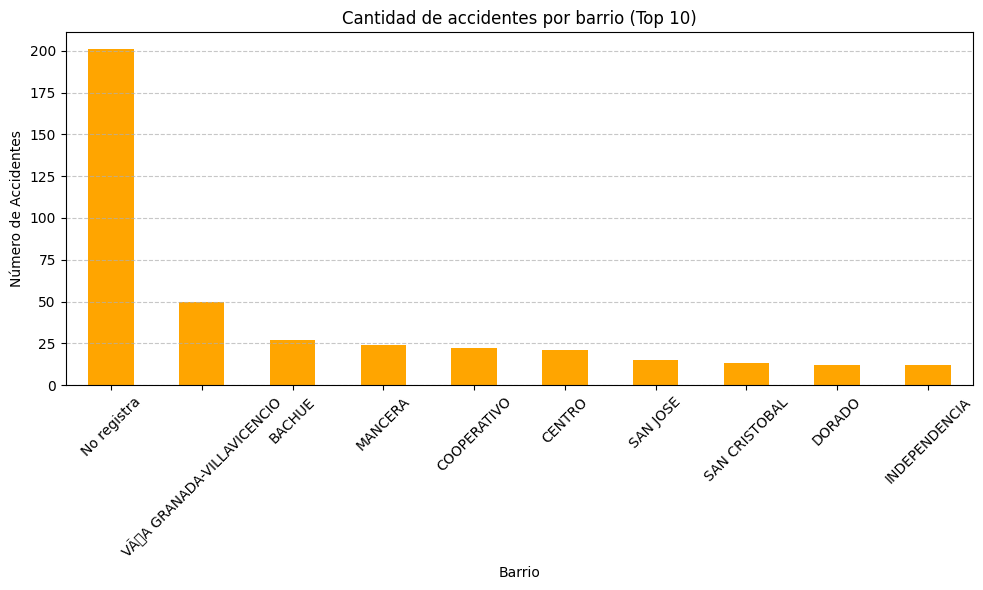

In [13]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
accidentes_por_barrio.plot(kind='bar', color='orange')
plt.title('Cantidad de accidentes por barrio (Top 10)')
plt.xlabel('Barrio')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Asegurar que la columna 'Heridos' esté en formato numérico
df['Heridos'] = pd.to_numeric(df['Heridos'], errors='coerce')

In [15]:
# Calcular el promedio de heridos por clase de accidente
promedio_heridos = df.groupby('Clase_Accidente')['Heridos'].mean().sort_values()

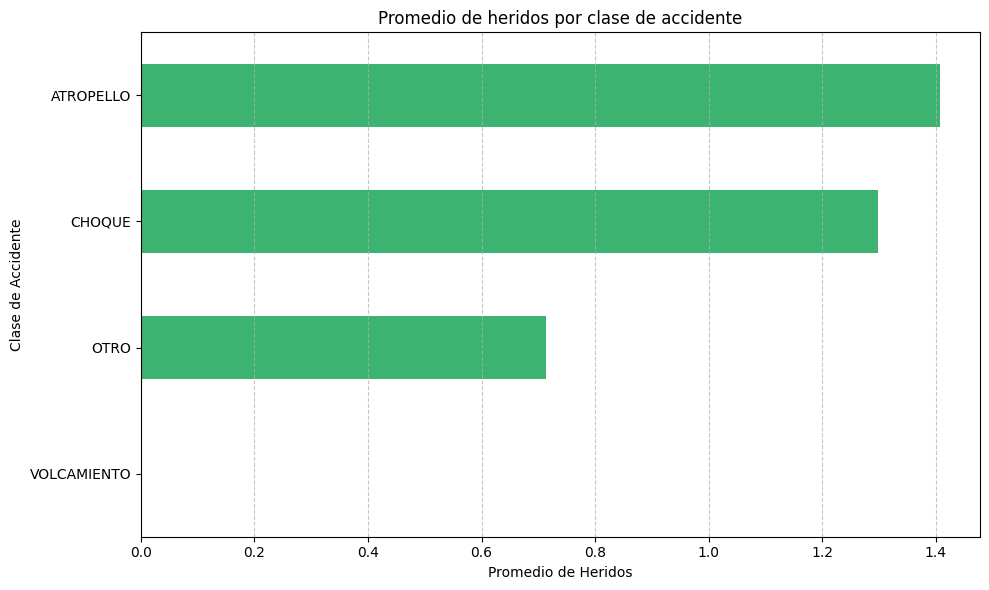

In [16]:

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
promedio_heridos.plot(kind='barh', color='mediumseagreen')
plt.title('Promedio de heridos por clase de accidente')
plt.xlabel('Promedio de Heridos')
plt.ylabel('Clase de Accidente')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
#libreria para limpieza de datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [18]:
print(df.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO ', 'Muertes', 'Clase_Accidente', 'Mes_Año']


In [19]:
#df["Heridos_BIN"] = df["Heridos SI/NO "].map({"SI": 1, "NO": 0})

In [20]:
# 4. Seleccionar variables para el modelo inicial
#features = ["Clase de Accidente", "Barrio", "Vehiculos Involucrados"]
#target = "Heridos_BIN"

In [21]:
# Asegurarte de que las columnas existan y no tengan espacios
df_raw = pd.read_csv('/workspaces/proyecto1/datos/Accidentes_Viales_final.csv', encoding='ISO-8859-1')
df_raw.columns = df_raw.columns.str.strip()

In [22]:
df_raw.columns = df_raw.columns.str.strip()

In [72]:

# Replace non-numeric values with 0
df_raw["Heridos"] = df_raw["Heridos"].replace('NO APLICA', 0)
df_raw["Muertes"] = df_raw["Muertes"].replace('NO APLICA', 0)

# Ensure columns are integers
df_raw["Heridos"] = df_raw["Heridos"].astype(int)
df_raw["Muertes"] = df_raw["Muertes"].astype(int)

# Define the function
def clasificar_accidente(row):
    if row["Heridos"] == 0 and row["Muertes"] == 0:
        return "Leve"
    elif row["Heridos"] == 1 and row["Muertes"] == 0:
        return "Medio"
    elif row["Heridos"] > 1 and row["Muertes"] > 1:
        return "Grave"
    else:
        return "Grave"

# Apply the function
df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)

# Check the data
df_raw.head()



,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente,Tipo_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE,Grave
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE,Grave
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE,Medio
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE,Grave
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE,Medio


In [73]:
# Aplicar la función fila por fila
df_raw["Tipo_Accidente"] = df_raw.apply(clasificar_accidente, axis=1)
df_raw.head()


,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos_Involucrados,Heridos,Accidente _con,Heridos _SI/NO,Muertes,Clase_Accidente,Tipo_Accidente
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE,Grave
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE,Grave
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE,Medio
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE,Grave
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE,Medio


In [25]:
#definiendo los modelos de acuerdo a los Datos
X = df_raw[["Heridos", "Muertes", "Clase_Accidente"]]
y = df_raw["Tipo_Accidente"]

In [26]:
# 7. Detectar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(include="number").columns.tolist()

In [27]:
# 8. Definir el preprocesamiento automático
preprocesador = ColumnTransformer(transformers=[
    ("num", SimpleImputer(strategy="mean"), num_cols),
    ("cat", Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)])

In [28]:
# 9. Crear pipeline del modelo
#hacer pasosconsecutivos
modelo = Pipeline(steps=[
    ("prep", preprocesador),
    ("logreg", LogisticRegression(max_iter=200))])

In [29]:
#mostras en pantalla 
print("Número de filas en X:", X.shape[0])
print("Columnas:", X.columns.tolist())
print("Primeras filas:")
print(X.head())

Número de filas en X: 512
Columnas: ['Heridos', 'Muertes', 'Clase_Accidente']
Primeras filas:
   Heridos Muertes Clase_Accidente
0        2       0          CHOQUE
1        3       0          CHOQUE
2        1       0          CHOQUE
3        2       0          CHOQUE
4        1       0          CHOQUE


In [30]:
#limpiando una de la variables para que no altere el resultado
df.columns = df.columns.str.strip()  # Limpia nombres
print(df['Heridos _SI/NO'].unique())  # Revisa los valores únicos

df["Heridos_BIN"] = df['Heridos _SI/NO'].map({"SI": 1, "NO": 0})
print(df["Heridos_BIN"].value_counts(dropna=False)) 

[1 0]
Heridos_BIN
NaN    512
Name: count, dtype: int64


In [31]:
df_model = df[["Heridos", "Muertes", "Clase_Accidente"]].dropna()
print("Filas válidas para modelar:", len(df_model))


Filas válidas para modelar: 512


In [32]:
print(df.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO', 'Muertes', 'Clase_Accidente', 'Mes_Año', 'Heridos_BIN']


In [33]:
# Elimina espacios iniciales y finales
df.columns = df.columns.str.strip() 

In [34]:
# 2. Reemplazar 'NO APLICA' por 0 en la columna Muertes
df["Muertes"] = df["Muertes"].replace("NO APLICA", 0)

In [35]:
# 3. Convertir 'Heridos' y 'Muertes' a enteros (maneja errores)
df["Muertes"] = pd.to_numeric(df["Muertes"], errors="coerce").fillna(0).astype(int)
df["Heridos"] = pd.to_numeric(df["Heridos"], errors="coerce").fillna(0).astype(int)

In [36]:
if "Tipo_Accidente" not in df.columns:
    df["Tipo_Accidente"] = df.apply(clasificar_accidente, axis=1)

In [37]:
# 4. Crear columna Tipo_Accidente si no existe
def clasificar_accidente(row):
    if row["Heridos"] == 0 and row["Muertes"] == 0:
        return "Leve"
    elif row["Heridos"] == 1 and row["Muertes"] == 0:
        return "Medio"
    else:
        return "Grave"

In [38]:
# 5. Eliminar filas con nulos en columnas clave
df_limpio = df.dropna(subset=["Heridos", "Muertes", "Tipo_Accidente"])

In [39]:
# 6. Variables predictoras y objetivo
X = df_limpio[["Heridos", "Muertes"]]  # ✅ Lista de strings
y = df_limpio["Tipo_Accidente"]

In [40]:
# 7. Separar en entrenamiento y prueba, con estratificación
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
# 8. Entrenar modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [43]:
# 9. Predecir y evaluar
from sklearn.metrics import accuracy_score, classification_report

In [44]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [45]:

print("Accuracy del modelo:", accuracy)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy del modelo: 1.0

Reporte de clasificación:
               precision    recall  f1-score   support

       Grave       1.00      1.00      1.00        45
        Leve       1.00      1.00      1.00        13
       Medio       1.00      1.00      1.00        45

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [47]:
# 10. Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["Leve", "Medio", "Grave"])

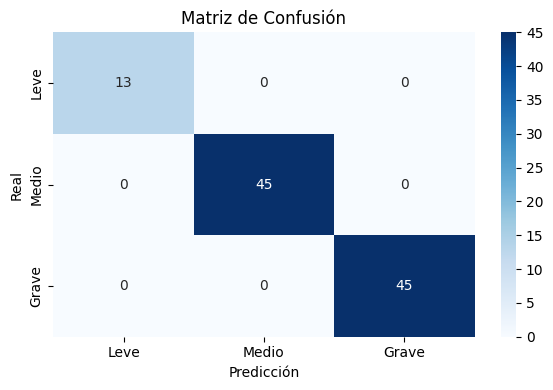

In [48]:
# 11. Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Leve", "Medio", "Grave"], yticklabels=["Leve", "Medio", "Grave"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

In [76]:
#EVAULACION DEL MODELO ANTES DE LIMPIAR LOS DATOS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Correct the definition of variables_modelo
variables_modelo = ["Heridos", "Muertes", "Clase_Accidente"]

# Prepare the data
df_before = df[variables_modelo].dropna()
Xb = df_before[["Heridos", "Muertes"]]
yb = df_before["Clase_Accidente"]

# Convert categorical variables to dummy variables
Xb = pd.get_dummies(Xb, drop_first=True)

# Split the data into training and testing sets
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# Train the logistic regression model
model_before = LogisticRegression(max_iter=200)
model_before.fit(Xb_train, yb_train)

# Predict and calculate accuracy
yb_pred = model_before.predict(Xb_test)
acc_before = accuracy_score(yb_test, yb_pred)

print("✅ Exactitud antes de la limpieza:", round(acc_before, 4))


✅ Exactitud antes de la limpieza: 0.9126


In [ ]:
#PREPARACION DATOS: LIEMPIEZA, CODIFICACION Y IMPUTACION
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df_clean = df_raw.copy()

# Imputación
imputer_edad = SimpleImputer(strategy='median')
df_clean['Heridos'] = imputer_edad.fit_transform(df_clean[['Heridos']])

imputer_ingreso = SimpleImputer(strategy='mean')
df_clean['Muertes'] = imputer_ingreso.fit_transform(df_clean[['Muertes']])

# Codificación de variables categóricas
df_clean = pd.get_dummies(df_clean, columns=['Codigo_Accidente', 'Direccion', 'Barrio','Accidente _con','Clase_Accidente'], drop_first=True)

# Escalado
scaler = MinMaxScaler()
df_clean[['Heridos','Muertes']] = scaler.fit_transform(df_clean[['Heridos','Muertes']])

In [79]:
print(df.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos_Involucrados', 'Heridos', 'Accidente _con', 'Heridos _SI/NO', 'Muertes', 'Clase_Accidente', 'Mes_Año', 'Heridos_BIN', 'Tipo_Accidente']


In [83]:
#EVAULACION DESPUES DEL MODELO DE LA LIMPIEZA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming df_clean is already defined and cleaned
# Drop columns that are not needed for the model
Xc = df_clean.drop(columns=['Heridos', 'Muertes', 'Tipo_Accidente'])
yc = df_clean['Tipo_Accidente']

# Convert categorical variables to dummy variables if necessary
Xc = pd.get_dummies(Xc, drop_first=True)

# Split the data into training and testing sets
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)

# Train the logistic regression model
model_after = LogisticRegression(max_iter=200)
model_after.fit(Xc_train, yc_train)

# Predict and calculate accuracy
yc_pred = model_after.predict(Xc_test)
acc_after = accuracy_score(yc_test, yc_pred)

print("✅ Exactitud después de la limpieza:", round(acc_after, 4))


✅ Exactitud después de la limpieza: 0.6039


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


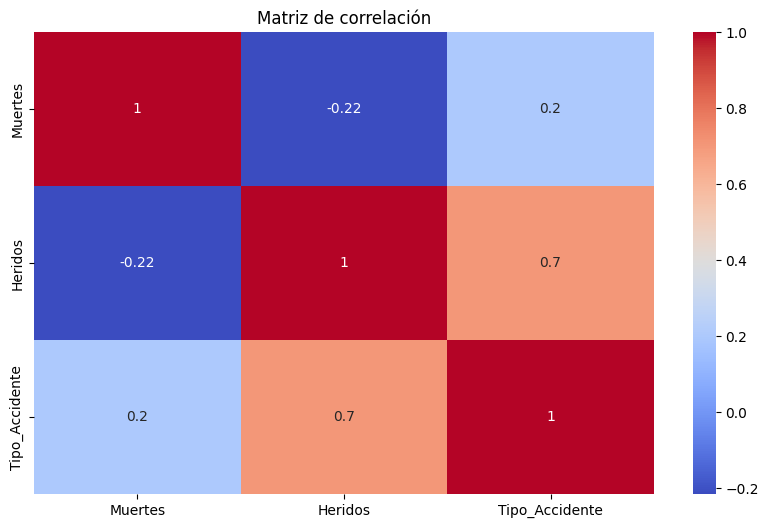

In [85]:
# Mapa de calor de correlaciones numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Mapping string values to numeric ones
df['Tipo_Accidente'] = df['Tipo_Accidente'].map({'Leve': 1, 'Moderado': 2, 'Grave': 3})

plt.figure(figsize=(10, 6))
sns.heatmap(df[['Muertes', 'Heridos', 'Tipo_Accidente']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [ ]:
#PREDICIONES DE LA PROBABILIDAD DE OCURRENCIA 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv('/workspaces/proyecto1/datos/Accidentes_Viales.csv', encoding='ISO-8859-1')

In [ ]:
# Ver los nombres exactos de las columnas
print(df.columns.tolist())

['ID', 'Fecha_Ocurrencia', 'Codigo_Accidente', 'Direccion', 'Barrio', 'Vehiculos Involucrados', 'Heridos', 'Accidente con', 'Heridos SI/NO ', 'Muertes', 'Clase de Accidente']


In [ ]:
# Eliminar espacios extra alrededor de los nombres
df.columns = df.columns.str.strip()
df['Accidente con'] = pd.to_numeric(df['Accidente con'], errors='coerce')

In [ ]:
# 2. Convertir columnas a numéricas
df['Heridos'] = pd.to_numeric(df['Heridos'], errors='coerce')
df['Accidente con'] = pd.to_numeric(df['Accidente con'], errors='coerce')

In [ ]:
# 3. Crear variable objetivo
df['Tipo_Accidente'] = ((df['Heridos'] == 0) & (df['Accidente con'] == 0)).astype(int)
df.head()

,ID,Fecha_Ocurrencia,Codigo_Accidente,Direccion,Barrio,Vehiculos Involucrados,Heridos,Accidente con,Heridos SI/NO,Muertes,Clase de Accidente,Heridos_BIN,Accidente_Leve
0,1,1/3/2024 0:00,A001602262,CALLE 14A CARRERA 34 BACHUE,BACHUE,2,2,HERIDOS,1,0,CHOQUE,NaN,0
1,2,1/6/2024 0:00,A001602263,CALLE 14 CARRERA 28 SAN JOSÃ,SAN JOSE,2,3,HERIDOS,1,0,CHOQUE,NaN,0
2,3,1/9/2024 0:00,A001602264,KILOMETRO 7+800 MTS,No registra,1,1,HERIDOS,1,0,CHOQUE,NaN,0
3,4,1/12/2024 0:00,A001602265,AVENIDA 23 N. 24 - 07 LA TIZA,LA TIZA,2,2,HERIDOS,1,0,CHOQUE,NaN,0
4,5,1/12/2024 0:00,A001602266,KILOMETRO 3+500 MTS VIA CHICHIMENE ESTACION AC...,No registra,2,1,HERIDOS,1,0,CHOQUE,NaN,0


In [ ]:
# 4. Seleccionar variables predictoras
X = df[['Clase de Accidente', 'Barrio', 'Vehiculos Involucrados']].dropna()
y = df.loc[X.index, 'Accidente_Leve']

In [ ]:
# 5. Codificación de variables categóricas
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# 6. División de datos
import numpy as np
print("Unique values in y:", np.unique(y))

# División de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Unique values in y: [0]


In [ ]:
# 7. Escalado
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# 8. Modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)